In [28]:
import pandas as pd
df = pd.read_csv("Final_Rohith_BPA.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 22 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Country                                                   2359 non-null   object 
 1   Year                                                      2359 non-null   int64  
 2   Current account balance                                   2359 non-null   float64
 3   General government net lending/borrowing                  2359 non-null   float64
 4   Gross domestic product per capita, current prices         2359 non-null   float64
 5   Gross domestic product, current prices                    2359 non-null   float64
 6   Inflation, average consumer prices                        2359 non-null   float64
 7   Population                                                2359 non-null   float64
 8   Unemployment rate 

In [30]:
print(df.describe())

              Year  Current account balance  \
count  2359.000000              2359.000000   
mean   1998.053412                -0.482284   
std      10.663352                57.676146   
min    1980.000000              -816.647000   
25%    1989.000000                -3.063500   
50%    1998.000000                -0.446000   
75%    2007.000000                 2.193000   
max    2016.000000               420.569000   

       General government net lending/borrowing  \
count                               2359.000000   
mean                                  -2.084014   
std                                    3.964980   
min                                  -32.119000   
25%                                   -4.220000   
50%                                   -2.116000   
75%                                    0.035000   
max                                   18.531000   

       Gross domestic product per capita, current prices  \
count                                        2359.000000

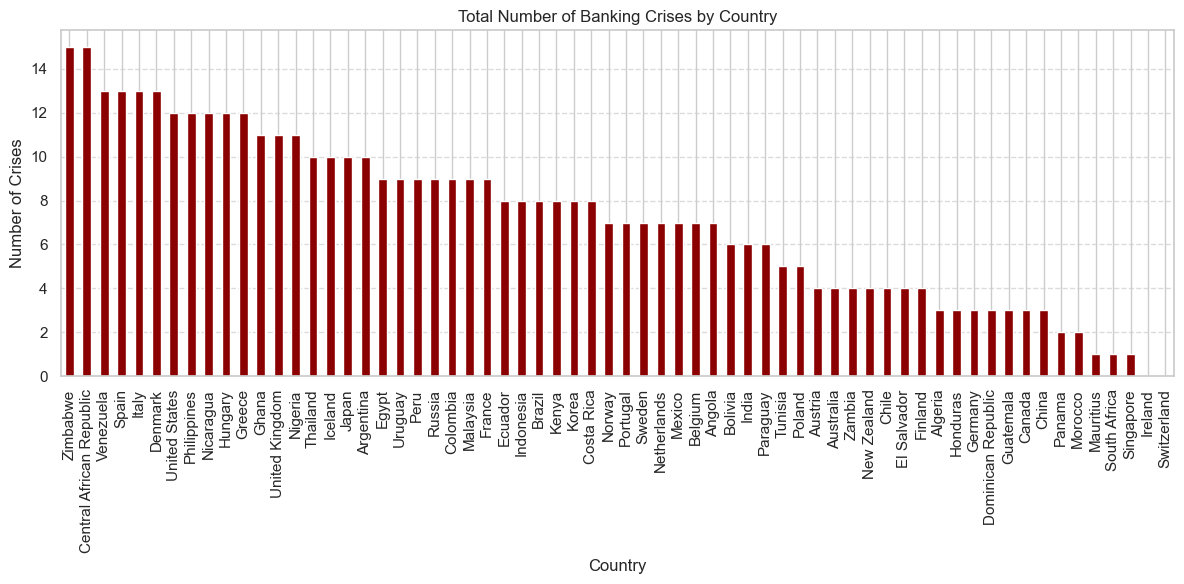

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Final_Rohith_BPA.csv")

# Group and sort
crisis_by_country = df.groupby('Country')['Banking Crisis'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
crisis_by_country.plot(kind='bar', color='darkred')
plt.title("Total Number of Banking Crises by Country")
plt.xlabel("Country")
plt.ylabel("Number of Crises")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Axes: title={'center': 'Banking Crises Over Time'}, xlabel='Year'>

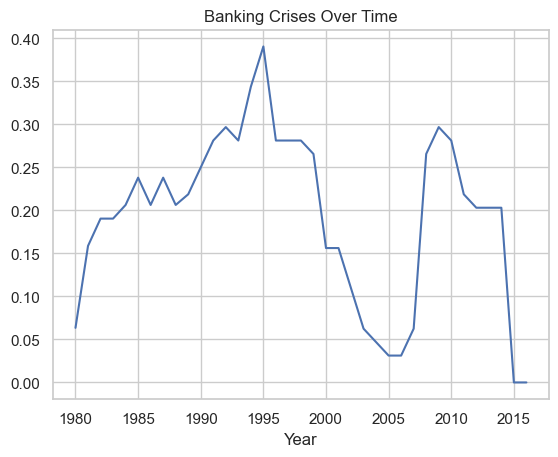

In [32]:
df.groupby('Year')['Banking Crisis'].mean().plot(title="Banking Crises Over Time")


<Axes: title={'center': 'Systemic Crisis Over Time'}, xlabel='Year'>

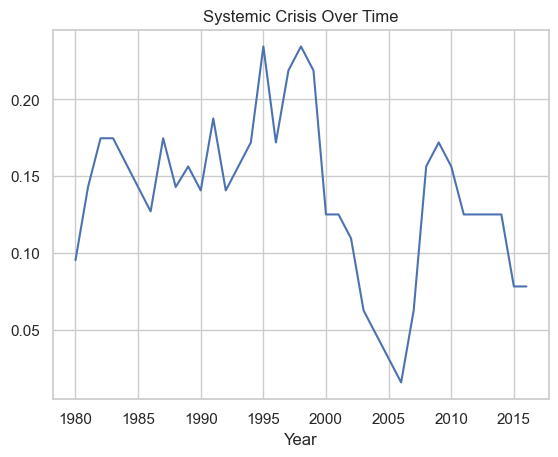

In [33]:
df.groupby('Year')['Systemic Crisis'].mean().plot(title="Systemic Crisis Over Time")


<Axes: title={'center': 'Inflation Crises Over Time'}, xlabel='Year'>

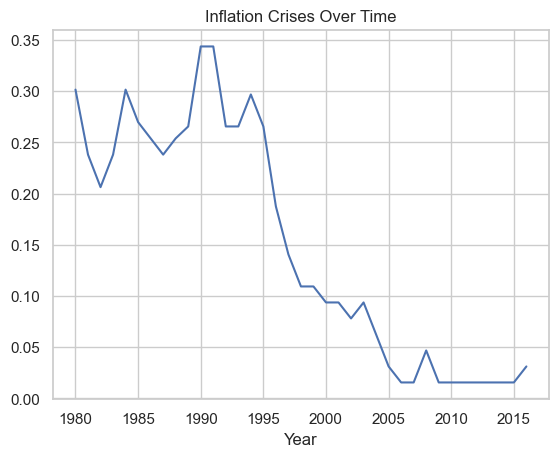

In [34]:
df.groupby('Year')['Inflation Crises'].mean().plot(title="Inflation Crises Over Time")


<Axes: title={'center': 'Currency Crises  Over Time'}, xlabel='Year'>

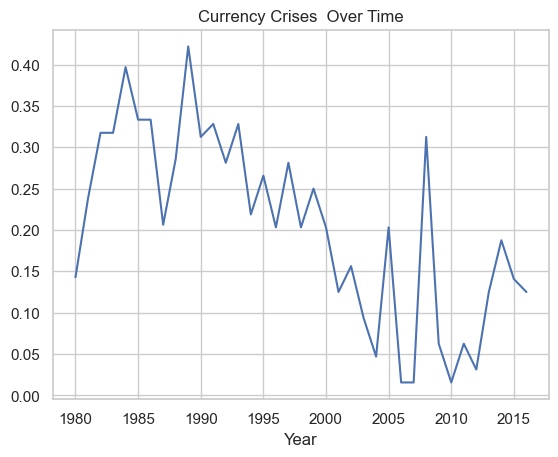

In [35]:
df.groupby('Year')['Currency Crises'].mean().plot(title="Currency Crises  Over Time")



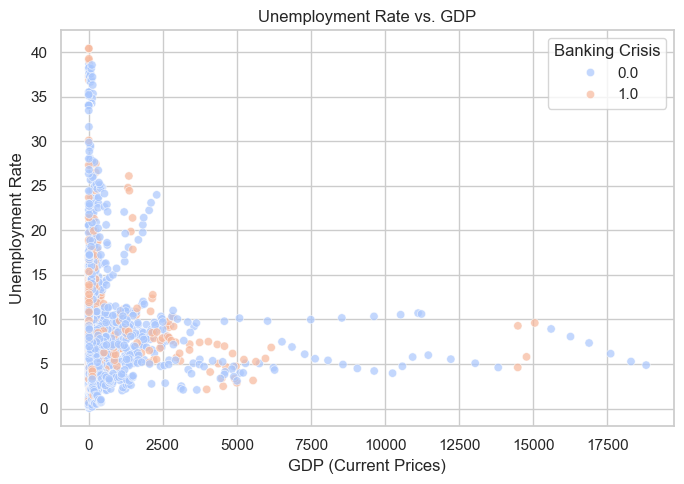

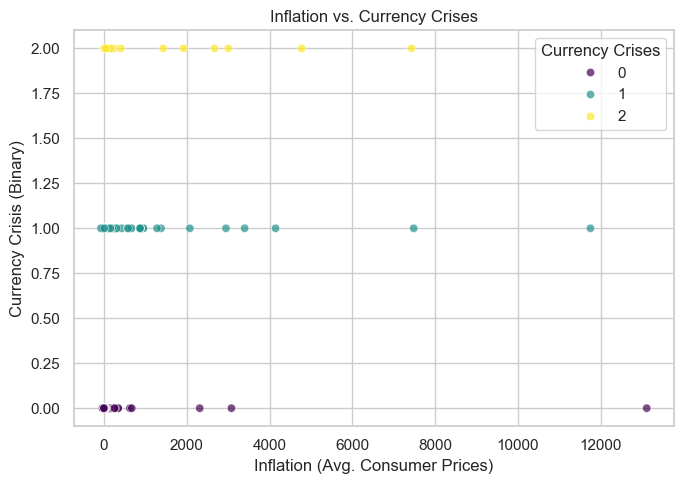

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("Final_Rohith_BPA.csv")

# Set consistent style
sns.set(style="whitegrid")

# 1. Unemployment Rate vs. GDP (current prices)
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df,
                x='Gross domestic product, current prices',
                y='Unemployment rate',
                hue='Banking Crisis', palette='coolwarm', alpha=0.7)
plt.title("Unemployment Rate vs. GDP")
plt.xlabel("GDP (Current Prices)")
plt.ylabel("Unemployment Rate")
plt.tight_layout()
plt.show()

# 2. Inflation vs. Currency Crises
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df,
                x='Inflation, average consumer prices',
                y='Currency Crises',
                hue='Currency Crises', palette='viridis', alpha=0.7)
plt.title("Inflation vs. Currency Crises")
plt.xlabel("Inflation (Avg. Consumer Prices)")
plt.ylabel("Currency Crisis (Binary)")
plt.tight_layout()
plt.show()


In [37]:
from scipy.stats import shapiro


df = pd.read_csv("Final_Rohith_BPA.csv")

# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Dictionary to store normality test results
normality_results = {}

# Loop through each numeric column and apply Shapiro-Wilk test
for column in numeric_df.columns:
    data = numeric_df[column].dropna()
    if len(data) > 3:  # Ensure sufficient data for test
        stat, p_value = shapiro(data)
        normality_results[column] = {
            'W-statistic': stat,
            'p-value': p_value
        }

# Convert results to DataFrame and sort by p-value
normality_df = pd.DataFrame(normality_results).T
normality_df = normality_df.sort_values(by='p-value')

# Display the result
print("Shapiro-Wilk Normality Test Results:\n")
print(normality_df)


Shapiro-Wilk Normality Test Results:

                                                    W-statistic       p-value
Banking Crisis                                         0.483722  0.000000e+00
Inflation, Annual percentages of average consum...     0.005831  0.000000e+00
GDP_Weighted_default                                   0.097102  0.000000e+00
Sovereign Debt 2                                       0.460293  0.000000e+00
Sovereign Debt 1                                       0.444217  0.000000e+00
Domestic_Debt_In_Default                               0.200924  0.000000e+00
exch_usd                                               0.014338  0.000000e+00
Systemic Crisis                                        0.407308  0.000000e+00
Currency Crises                                        0.500715  0.000000e+00
Inflation Crises                                       0.426416  0.000000e+00
Volume of exports of goods and services                0.393684  0.000000e+00
Unemployment rate         

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [38]:
from scipy.stats import shapiro
import pandas as pd

# Columns that are continuous and valid for normality testing
continuous_columns = [
    'Inflation, average consumer prices',
    'Inflation, Annual percentages of average consumer prices',
    'GDP_Weighted_default',
    'exch_usd',
    'Unemployment rate',
    'Population',
    'Volume of exports of goods and services',
    'Volume of imports of goods and services',
    'Gross domestic product per capita, current prices',
    'Gross domestic product, current prices',
    'General government net lending/borrowing',
    'Current account balance'
]

# Apply Shapiro-Wilk test for normality
normality_results = {}
for column in continuous_columns:
    data = df[column].dropna()
    if len(data) > 3:
        stat, p_value = shapiro(data)
        normality_results[column] = {
            'W-statistic': stat,
            'p-value': p_value
        }

# Convert to DataFrame and display
normality_df = pd.DataFrame(normality_results).T
normality_df = normality_df.sort_values(by='p-value')
print("Shapiro-Wilk Test Results on Continuous Variables:\n")
print(normality_df)


Shapiro-Wilk Test Results on Continuous Variables:

                                                    W-statistic       p-value
Inflation, average consumer prices                     0.065449  0.000000e+00
Inflation, Annual percentages of average consum...     0.005831  0.000000e+00
GDP_Weighted_default                                   0.097102  0.000000e+00
exch_usd                                               0.014338  0.000000e+00
Unemployment rate                                      0.799044  0.000000e+00
Population                                             0.328860  0.000000e+00
Volume of exports of goods and services                0.393684  0.000000e+00
Volume of imports of goods and services                0.083002  0.000000e+00
Gross domestic product per capita, current prices      0.746238  0.000000e+00
Gross domestic product, current prices                 0.340225  0.000000e+00
Current account balance                                0.388133  0.000000e+00
General gove

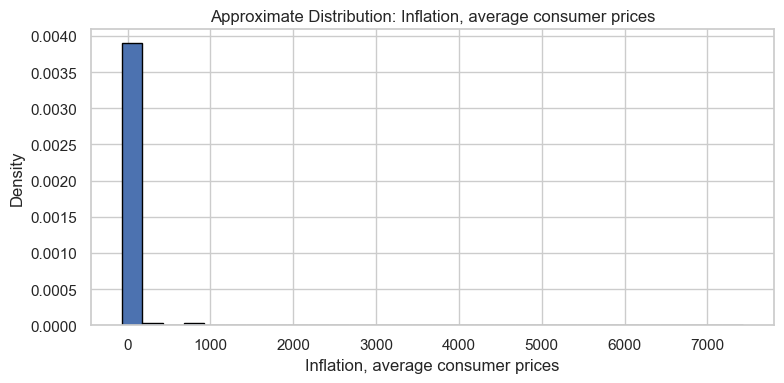

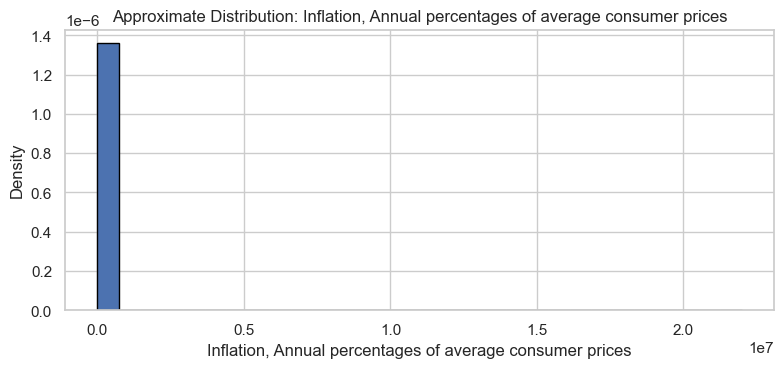

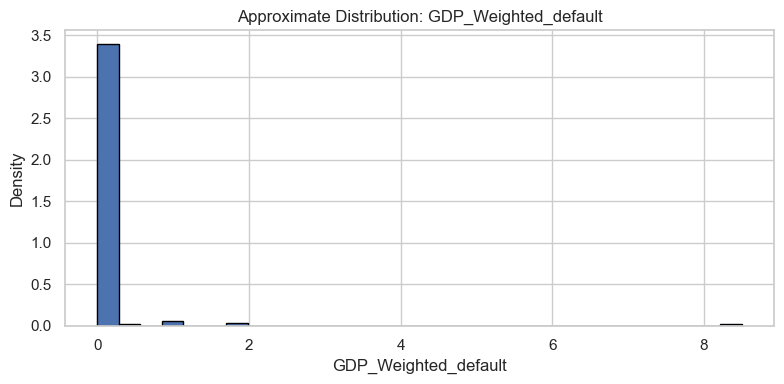

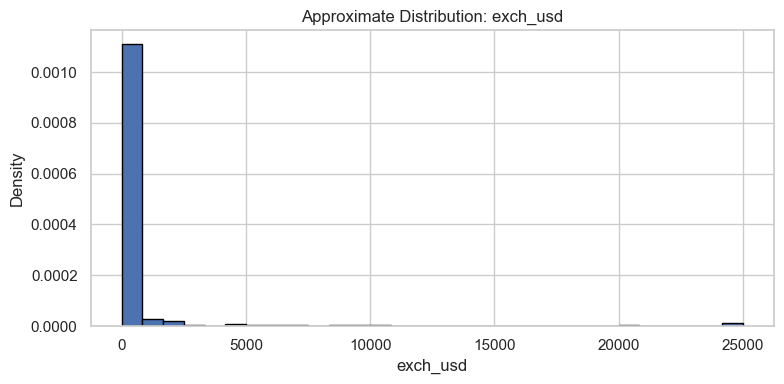

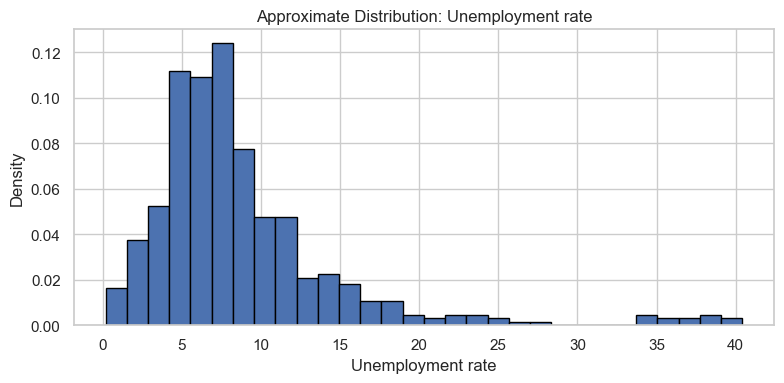

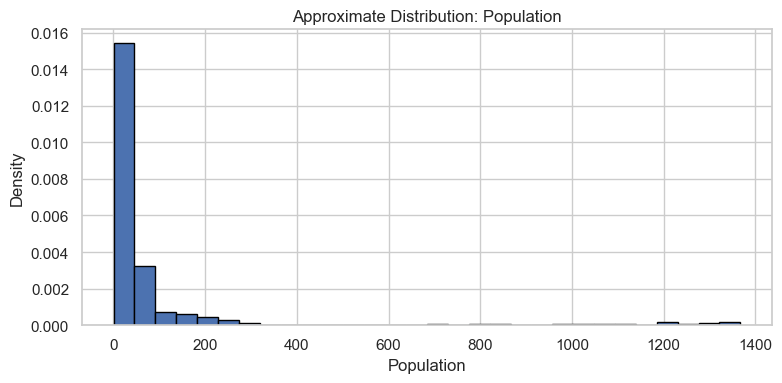

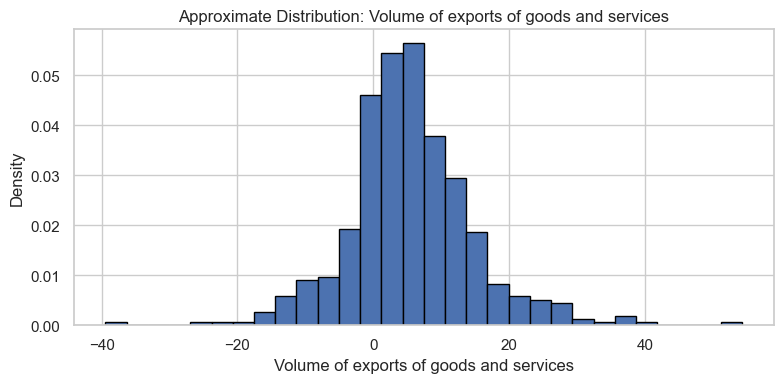

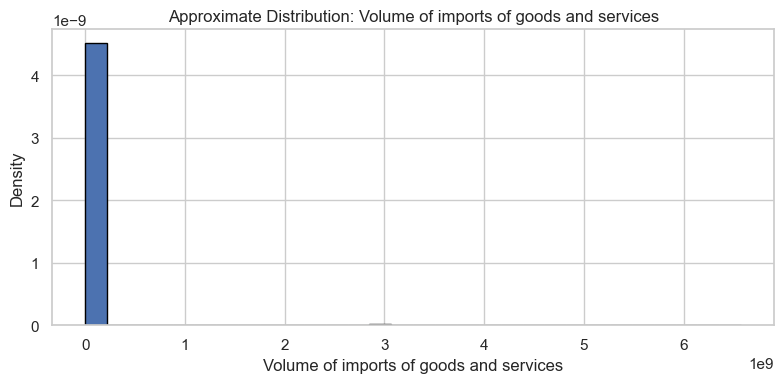

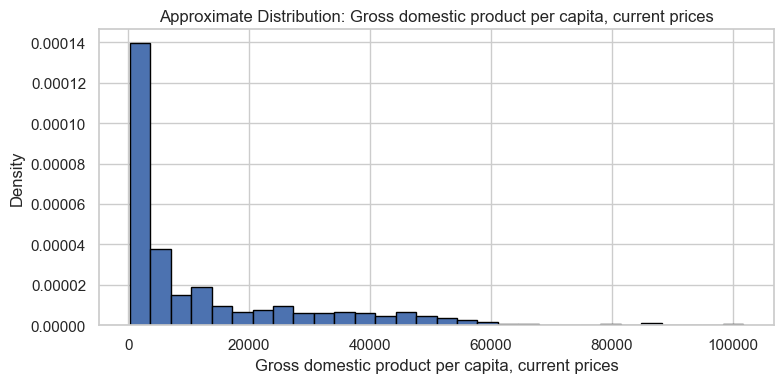

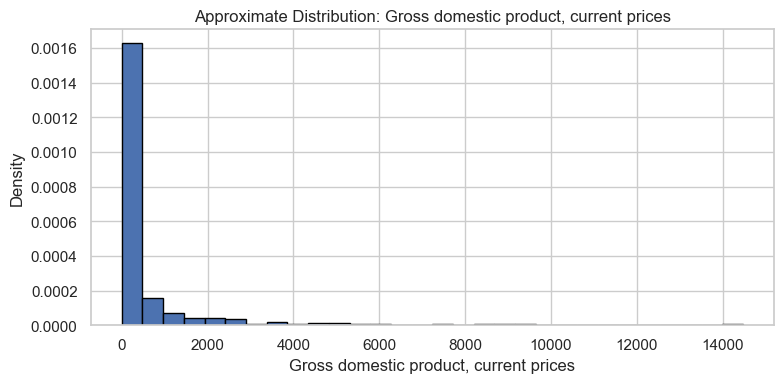

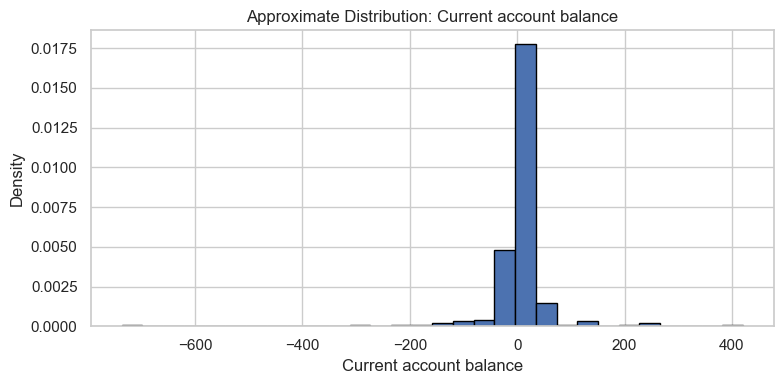

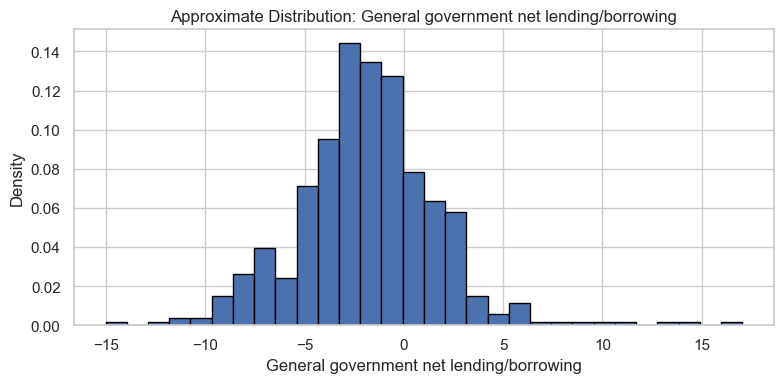

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("Final_Rohith_BPA.csv")

# List of continuous variables from the Shapiro-Wilk test
columns_to_plot = [
    'Inflation, average consumer prices',
    'Inflation, Annual percentages of average consumer prices',
    'GDP_Weighted_default',
    'exch_usd',
    'Unemployment rate',
    'Population',
    'Volume of exports of goods and services',
    'Volume of imports of goods and services',
    'Gross domestic product per capita, current prices',
    'Gross domestic product, current prices',
    'Current account balance',
    'General government net lending/borrowing'
]

# Optional: sample for speed (you can remove this if your system is fast enough)
sample_df = df.sample(n=500, random_state=42)

# Plotting loop
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    plt.hist(sample_df[col].dropna(), bins=30, edgecolor='black', density=True)
    plt.title(f'Approximate Distribution: {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


In [40]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler



# Keep only continuous numeric columns used in modeling
vif_features = [
    'Inflation, average consumer prices',
    'Inflation, Annual percentages of average consumer prices',
    'GDP_Weighted_default',
    'exch_usd',
    'Unemployment rate',
    'Population',
    'Volume of exports of goods and services',
    'Volume of imports of goods and services',
    'Gross domestic product per capita, current prices',
    'Gross domestic product, current prices',
    'Current account balance',
    'General government net lending/borrowing'
]

# Drop rows with missing values in selected columns
df_vif = df[vif_features].dropna()

# Standardize features for VIF stability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_vif)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_features
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)


                                              Feature       VIF
0                  Inflation, average consumer prices  1.147473
1   Inflation, Annual percentages of average consu...  1.017878
2                                GDP_Weighted_default  1.015803
3                                            exch_usd  1.137100
4                                   Unemployment rate  1.072891
5                                          Population  1.308816
6             Volume of exports of goods and services  1.029424
7             Volume of imports of goods and services  1.047129
8   Gross domestic product per capita, current prices  1.368358
9              Gross domestic product, current prices  1.835939
10                            Current account balance  1.385241
11           General government net lending/borrowing  1.052881


In [41]:
# This modifies the DataFrame directly
df['Currency Crises'] = df['Currency Crises'].apply(lambda x: 1 if x >= 1 else 0)


In [42]:
print(df['Currency Crises'].value_counts(dropna=False))


Currency Crises
0    1892
1     467
Name: count, dtype: int64


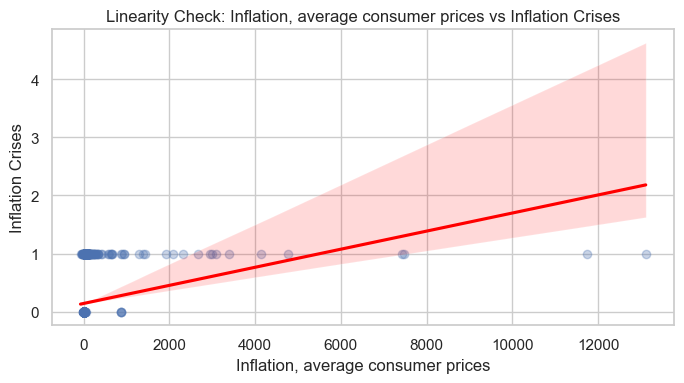

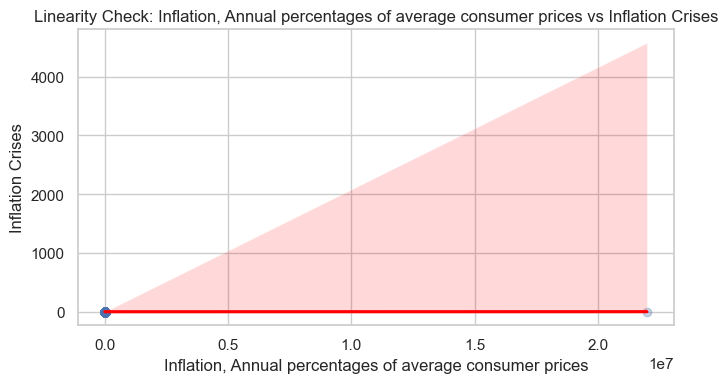

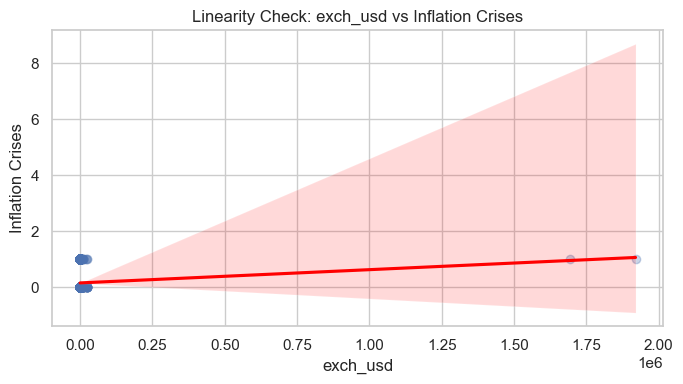

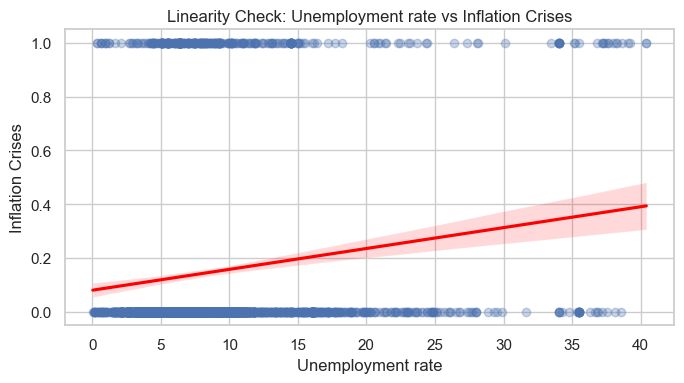

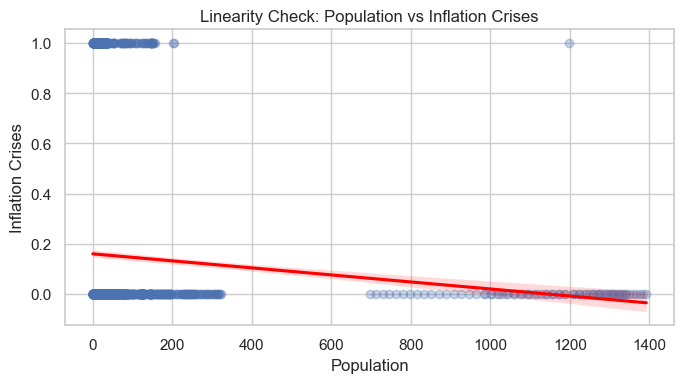

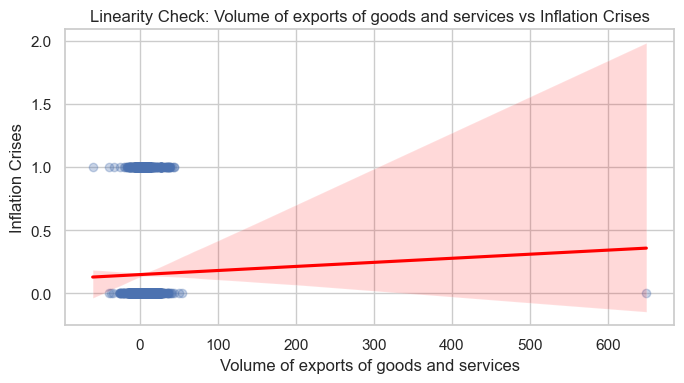

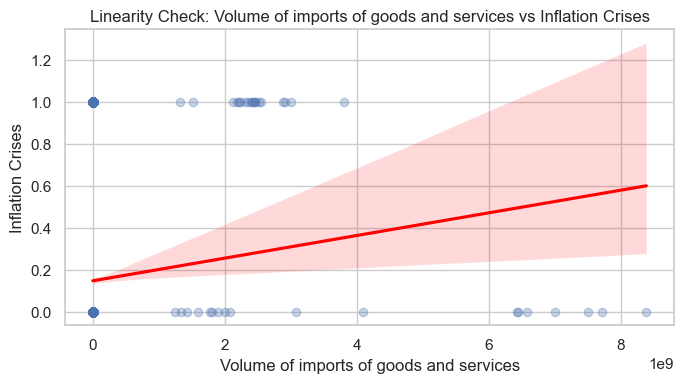

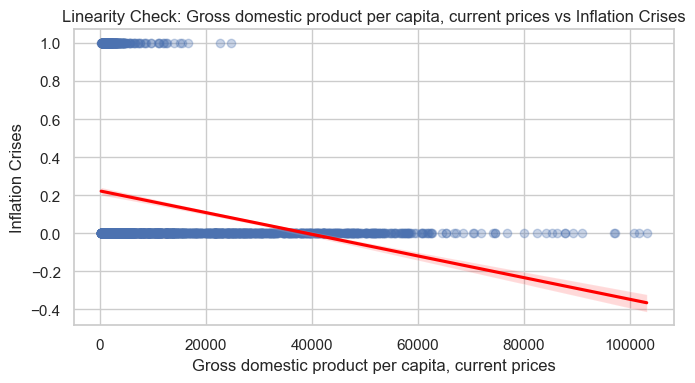

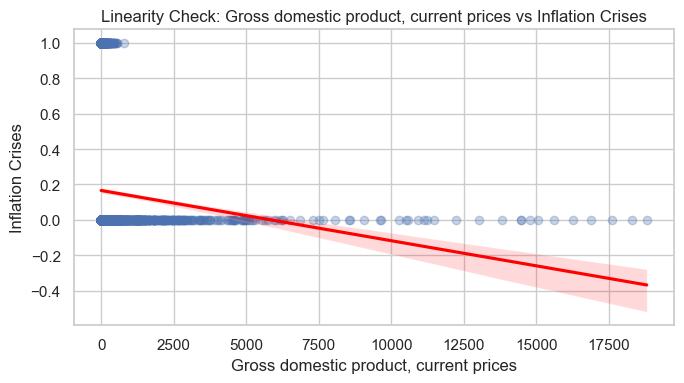

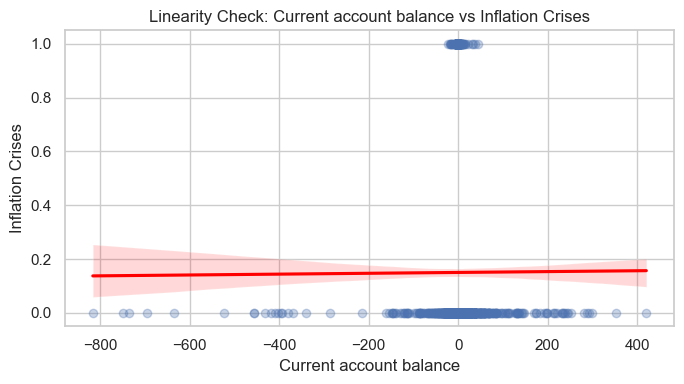

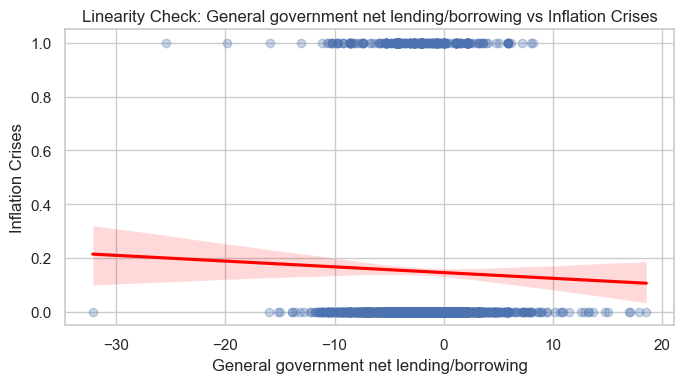

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define independent variables and target
features = [
    'Inflation, average consumer prices',
    'Inflation, Annual percentages of average consumer prices',
    'exch_usd',
    'Unemployment rate',
    'Population',
    'Volume of exports of goods and services',
    'Volume of imports of goods and services',
    'Gross domestic product per capita, current prices',
    'Gross domestic product, current prices',
    'Current account balance',
    'General government net lending/borrowing'
]
target = 'Inflation Crises'
# Drop NaNs
df_clean = df[features + [target]].dropna()

# Plot linearity for each feature
for col in features:
    plt.figure(figsize=(7, 4))
    sns.regplot(x=df_clean[col], y=df_clean[target], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title(f'Linearity Check: {col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()


In [44]:
# One-hot encode 'Country'
df = pd.get_dummies(df, columns=['Country'], drop_first=True)


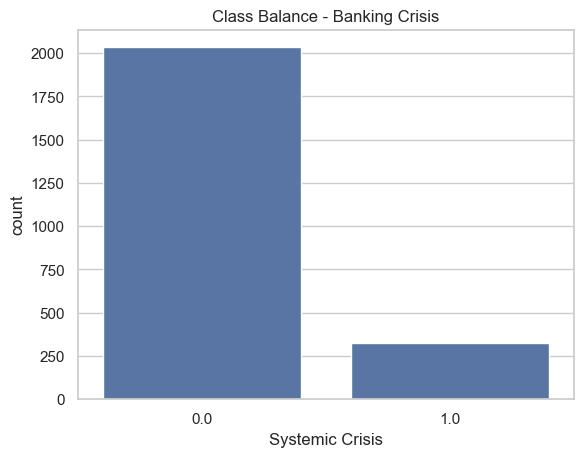

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: for Banking Crisis (binary)
sns.countplot(x='Systemic Crisis', data=df)
plt.title("Class Balance - Banking Crisis")
plt.show()


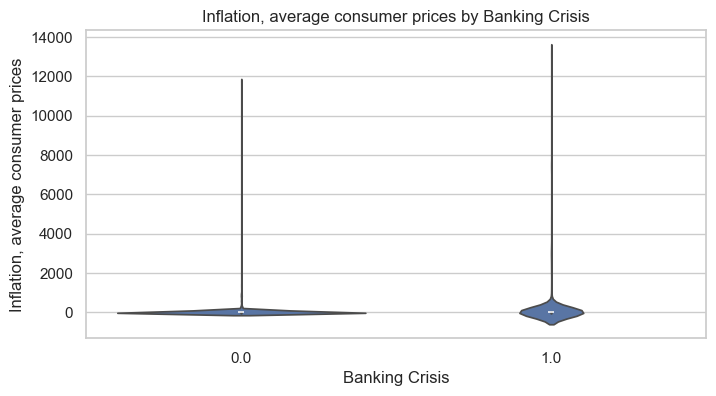

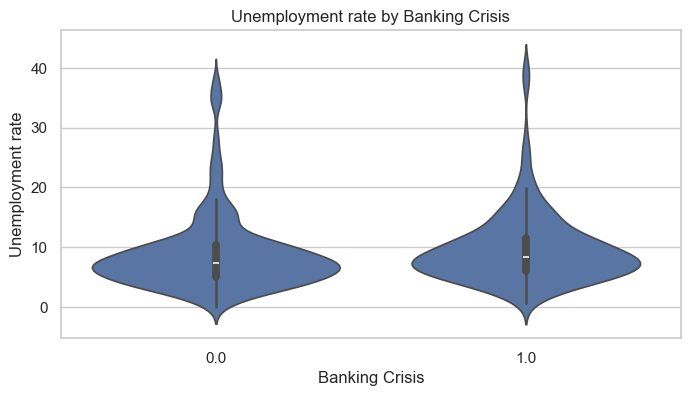

In [46]:
# Plot feature distributions for each class
features = ['Inflation, average consumer prices', 'Unemployment rate']
target = 'Banking Crisis'

for col in features:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=df[target], y=df[col])
    plt.title(f'{col} by {target}')
    plt.show()


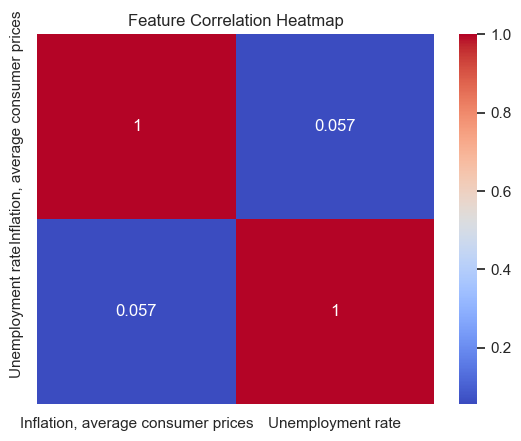

In [47]:
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [48]:
print(df['Currency Crises'].value_counts(dropna=False))


Currency Crises
0    1892
1     467
Name: count, dtype: int64


In [49]:
df.drop('Inflation Crises', axis=1, inplace=True)

In [50]:
targets = ['Banking Crisis', 'Currency Crises', 'Systemic Crisis']

In [51]:
#print(df['Currency Crises'].value_counts())


In [53]:
#inflation_corr = correlations["Inflation Crises"].drop("Inflation Crises")
#high_corr_features = inflation_corr[abs(inflation_corr) > 0.85]
#print(high_corr_features.sort_values(ascending=False))


In [54]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Feature matrix (drop all target columns)
X = df.drop(columns=targets)

# Multi-target labels
y = df[targets]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train MultiOutputClassifier
multi_clf = MultiOutputClassifier(RandomForestClassifier(random_state=42))
multi_clf.fit(X_train, y_train)

# Predict
y_pred = multi_clf.predict(X_test)

# Evaluate each target
for i, column in enumerate(targets):
    print(f"Classification report for {column}:\n")
    print(classification_report(y_test[column], y_pred[:, i]))


Classification report for Banking Crisis:

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       369
         1.0       0.87      0.38      0.53       103

    accuracy                           0.85       472
   macro avg       0.86      0.68      0.72       472
weighted avg       0.85      0.85      0.83       472

Classification report for Currency Crises:

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       385
           1       0.71      0.48      0.58        87

    accuracy                           0.87       472
   macro avg       0.80      0.72      0.75       472
weighted avg       0.86      0.87      0.86       472

Classification report for Systemic Crisis:

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       402
         1.0       0.81      0.30      0.44        70

    accuracy                           0.89       4

In [55]:
import xgboost


In [57]:
# Quick correlation check
#mport pandas as pd
#correlations = pd.concat([X, y], axis=1).corr()
#print(correlations['Inflation Crises'].sort_values(ascending=False))


In [58]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

# Initialize and train XGBoost
xgb_model = MultiOutputClassifier(XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss',
    random_state=42
))

xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("=== XGBoost MultiOutput Classification Results ===")
for i, column in enumerate(targets):
    print(f"\nClassification report for {column}:")
    print(classification_report(y_test[column], y_pred_xgb[:, i]))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost MultiOutput Classification Results ===

Classification report for Banking Crisis:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92       369
         1.0       0.80      0.50      0.62       103

    accuracy                           0.86       472
   macro avg       0.84      0.73      0.77       472
weighted avg       0.86      0.86      0.85       472


Classification report for Currency Crises:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       385
           1       0.68      0.44      0.53        87

    accuracy                           0.86       472
   macro avg       0.78      0.70      0.72       472
weighted avg       0.84      0.86      0.85       472


Classification report for Systemic Crisis:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       402
         1.0       0.83      0.49      0.61        70



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5))
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

for i, column in enumerate(targets):
    print(f"\nKNN - {column}:\n")
    print(classification_report(y_test[column], y_pred_knn[:, i]))



KNN - Banking Crisis:

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       369
         1.0       0.51      0.25      0.34       103

    accuracy                           0.78       472
   macro avg       0.66      0.59      0.60       472
weighted avg       0.75      0.78      0.75       472


KNN - Currency Crises:

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       385
           1       0.58      0.29      0.38        87

    accuracy                           0.83       472
   macro avg       0.72      0.62      0.64       472
weighted avg       0.80      0.83      0.81       472


KNN - Systemic Crisis:

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       402
         1.0       0.61      0.24      0.35        70

    accuracy                           0.86       472
   macro avg       0.74      0.61      0.64       472
